In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [182]:
# reading the csv file.
df = pd.read_csv('yellow_taxi_data.csv')

In [183]:
df.shape

(2463931, 20)

In [184]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [185]:
# Datatypes of all columns
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

In [186]:
# Conversion of pickup/drop time into Datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [187]:
# Feature extraction
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration(min)']=df['duration'].dt.total_seconds()/60

In [188]:
# Keeping only essential columns
df = df[['passenger_count','trip_distance','payment_type','fare_amount','duration(min)']]
df.shape

(2463931, 5)

In [189]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration(min)
0,2.0,3.80,1,14.50,17.816667
1,1.0,2.10,1,8.00,8.400000
2,1.0,0.97,1,7.50,8.966667
3,1.0,1.09,2,8.00,10.033333
4,1.0,4.30,1,23.50,37.533333
...,...,...,...,...,...
2463926,NaN,1.32,0,8.00,5.966667
2463927,NaN,4.19,0,16.80,10.650000
2463928,NaN,2.10,0,11.22,11.000000
2463929,NaN,2.92,0,12.40,12.050000


In [190]:
# Count of Missing values
df.isnull().sum()

passenger_count    71503
trip_distance          0
payment_type           0
fare_amount            0
duration(min)          0
dtype: int64

In [191]:
# Percentage of null values in each col
for col in df.columns:
    print(col,(df[col].isnull().sum()/len(df))*100)

passenger_count 2.901988732639023
trip_distance 0.0
payment_type 0.0
fare_amount 0.0
duration(min) 0.0


In [192]:
# Drop rows with null values
df.dropna(inplace = True)
df.shape

(2392428, 5)

In [193]:
# Dropping duplicates values
df.drop_duplicates(inplace = True)

In [194]:
df.shape

(1392750, 5)

In [195]:
# Changing datatypes
df['passenger_count']=df['passenger_count'].astype(int)

In [196]:
df.shape

(1392750, 5)

In [197]:
# Removing unnesessary rows 
print(df['passenger_count'].value_counts(normalize = True))
df = df[(df['passenger_count'] >0) & (df['passenger_count'] <7)]

print(df['payment_type'].value_counts(normalize = True))
df = df[df['payment_type'] < 3]

passenger_count
1    0.655014
2    0.182712
3    0.054463
5    0.034891
0    0.026420
4    0.024229
6    0.022257
7    0.000006
8    0.000006
9    0.000002
Name: proportion, dtype: float64
payment_type
1    7.274617e-01
2    2.590753e-01
4    7.059341e-03
3    6.402967e-03
5    7.374990e-07
Name: proportion, dtype: float64


In [198]:
# Replacing values of 'payment_type'
df['payment_type'].replace([1,2],["card",'cash'],inplace = True)


In [199]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration(min)
count,1.337679e+06,1.337679e+06,1.337679e+06,1.337679e+06
mean,1.636131e+00,4.360157e+00,1.651975e+01,1.880479e+01
std,1.179445e+00,5.255656e+00,1.457466e+01,6.186795e+01
min,1.000000e+00,0.000000e+00,-2.000000e+02,0.000000e+00
25%,1.000000e+00,1.430000e+00,8.000000e+00,8.633333e+00
50%,1.000000e+00,2.520000e+00,1.200000e+01,1.376667e+01
75%,2.000000e+00,4.820000e+00,1.900000e+01,2.071667e+01
max,6.000000e+00,6.510000e+02,7.200000e+02,8.513183e+03


In [200]:
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]
df = df[df['duration(min)']>0]

In [201]:
df.shape

(1322330, 5)

In [202]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration(min)
count,1.322330e+06,1.322330e+06,1.322330e+06,1.322330e+06
mean,1.639576e+00,4.405344e+00,1.638004e+01,1.879946e+01
std,1.182578e+00,5.263261e+00,1.399260e+01,6.135644e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.460000e+00,8.000000e+00,8.700000e+00
50%,1.000000e+00,2.560000e+00,1.200000e+01,1.380000e+01
75%,2.000000e+00,4.890000e+00,1.850000e+01,2.068333e+01
max,6.000000e+00,6.510000e+02,6.680000e+02,7.890833e+03


In [203]:
df['fare_amount'].mean()

np.float64(16.380035361823452)

In [204]:
df['trip_distance'].median()

np.float64(2.56)

In [205]:
avg_fare_per_mile = df['fare_amount'].sum()/df['trip_distance'].sum()
avg_fare_per_mile 

np.float64(3.718219530003464)

In [206]:

df['duration(min)'].max()

np.float64(7890.833333333333)

## Outlier Detection

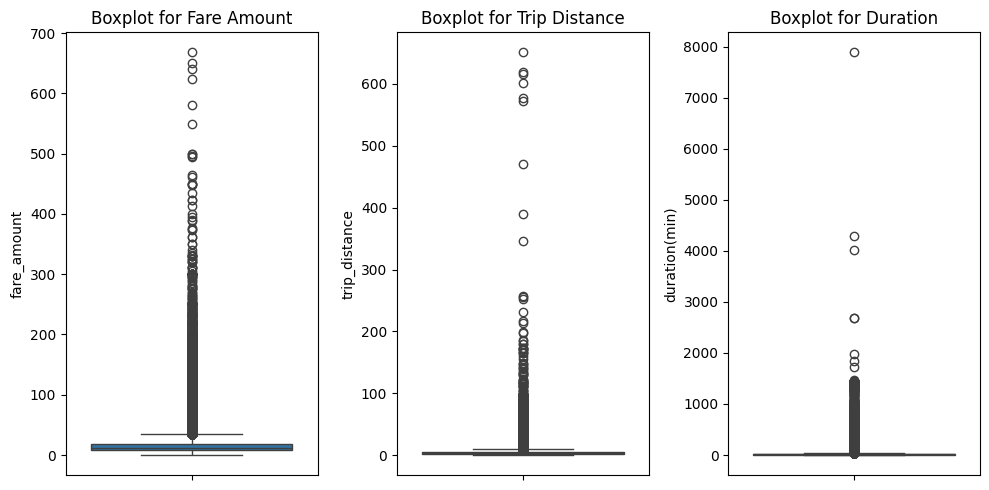

In [207]:
# Box plot for Outlier detection
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.boxplot(df['fare_amount'])
plt.title("Boxplot for Fare Amount")

plt.subplot(1,3,2)
sns.boxplot(df['trip_distance'])
plt.title("Boxplot for Trip Distance")

plt.subplot(1,3,3)
sns.boxplot(df['duration(min)'])
plt.title("Boxplot for Duration")
plt.tight_layout()

In [208]:
# Removing Outliers
for col in ['trip_distance','fare_amount','duration(min)']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    print( col, lower_bound,upper_bound)

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

trip_distance -3.6849999999999996 10.035
fare_amount -4.5 27.5
duration(min) -6.074999999999999 31.458333333333332


## Distribution by payment_type 

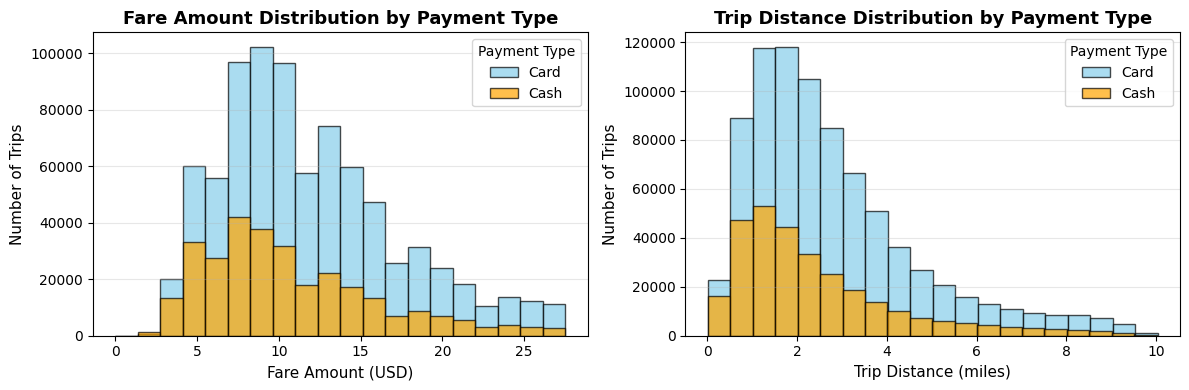

In [209]:
plt.figure(figsize=(12, 4))

# Fare Amount Distribution by Payment Type
plt.subplot(1, 2, 1)
plt.hist(df[df['payment_type'] == "card"]['fare_amount'],
         bins=20,
         alpha=0.7,
         color='skyblue',
         edgecolor='black',
         label='Card')

plt.hist(df[df['payment_type'] == "cash"]['fare_amount'],
         bins=20,
         alpha=0.7,
         color='orange',
         edgecolor='black',
         label='Cash')

plt.title("Fare Amount Distribution by Payment Type", fontsize=13, fontweight='bold')
plt.xlabel("Fare Amount (USD)", fontsize=11)
plt.ylabel("Number of Trips", fontsize=11)
plt.legend(title="Payment Type")
plt.grid(axis='y', alpha=0.3)

# Trip Distance Distribution by Payment Type
plt.subplot(1, 2, 2)
plt.hist(df[df['payment_type'] == "card"]['trip_distance'],
         bins=20,
         alpha=0.7,
         color='skyblue',
         edgecolor='black',
         label='Card')

plt.hist(df[df['payment_type'] == "cash"]['trip_distance'],
         bins=20,
         alpha=0.7,
         color='orange',
         edgecolor='black',
         label='Cash')

plt.title("Trip Distance Distribution by Payment Type", fontsize=13, fontweight='bold')
plt.xlabel("Trip Distance (miles)", fontsize=11)
plt.ylabel("Number of Trips", fontsize=11)
plt.legend(title="Payment Type")
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## Average and Standard Deviation of Fare Amount and Trip Distance by Payment Type

In [210]:
df.groupby('payment_type').agg({"fare_amount" : ["mean","std"] , "trip_distance": ["mean","std"]})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card           11.886193  5.372551      2.784700  1.893287
cash           10.699797  5.285065      2.417075  1.835624

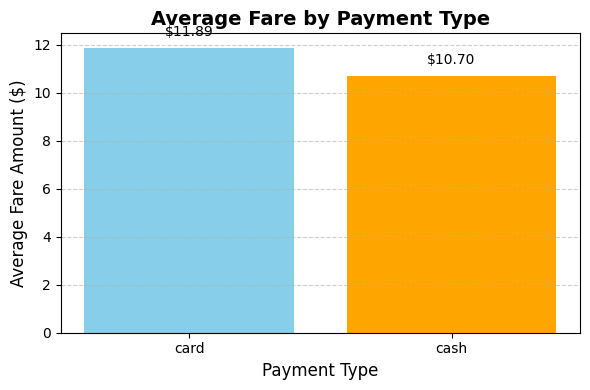

In [211]:

avg_fare = df.groupby('payment_type')['fare_amount'].mean().reset_index()


plt.figure(figsize=(6,4))
plt.bar(avg_fare['payment_type'], avg_fare['fare_amount'], 
        color=['#87CEEB', '#FFA500'])  # skyblue for card, orange for cash

# Add chart labels and title
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Average Fare Amount ($)", fontsize=12)
plt.title("Average Fare by Payment Type", fontsize=14, fontweight='bold')

# Add values on top of bars
for i, val in enumerate(avg_fare['fare_amount']):
    plt.text(i, val + 0.5, f"${val:.2f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Distribution of payment_type

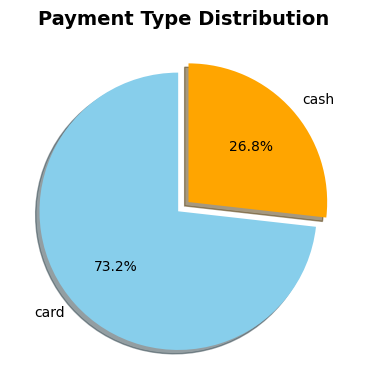

In [212]:
# pie chart to show payment_type distribution
payment_counts = df['payment_type'].value_counts(normalize=True)
labels = payment_counts.index
sizes = payment_counts.values

# Pie chart
plt.figure(figsize=(10, 4))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',       
        startangle=90,           
        colors=['skyblue', 'orange'],  
        explode=[0.05]*len(labels),  
        shadow=True)

plt.title("Payment Type Distribution", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Distribution of Passenger Count by Payment Type (with Percentage Share)

In [213]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace = True)
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,531156,47.555633
1,card,2,157912,14.138229
2,card,3,50198,4.494344
3,card,4,21577,1.931839
4,card,5,35069,3.139809
5,card,6,21847,1.956013
6,cash,1,207064,18.538922
7,cash,2,53449,4.785413
8,cash,3,15754,1.410492
9,cash,4,7570,0.677760


## Percentage Distribution of Passenger Counts (1–6) by Payment Type

In [214]:
dataframe = pd.DataFrame(columns = ['payment_type',1,2,3,4,5,6])
dataframe['payment_type'] = ['card','cash']
dataframe.iloc[0,1:] = passenger_count.iloc[0:6,-1]
dataframe.iloc[1,1:] = passenger_count.iloc[6:,-1]
dataframe

,payment_type,1,2,3,4,5,6
0,card,47.555633,14.138229,4.494344,1.931839,3.139809,1.956013
1,cash,18.538922,4.785413,1.410492,0.67776,0.828174,0.543372


## Distribution of Trip Percentages by Passenger Count and Payment Type

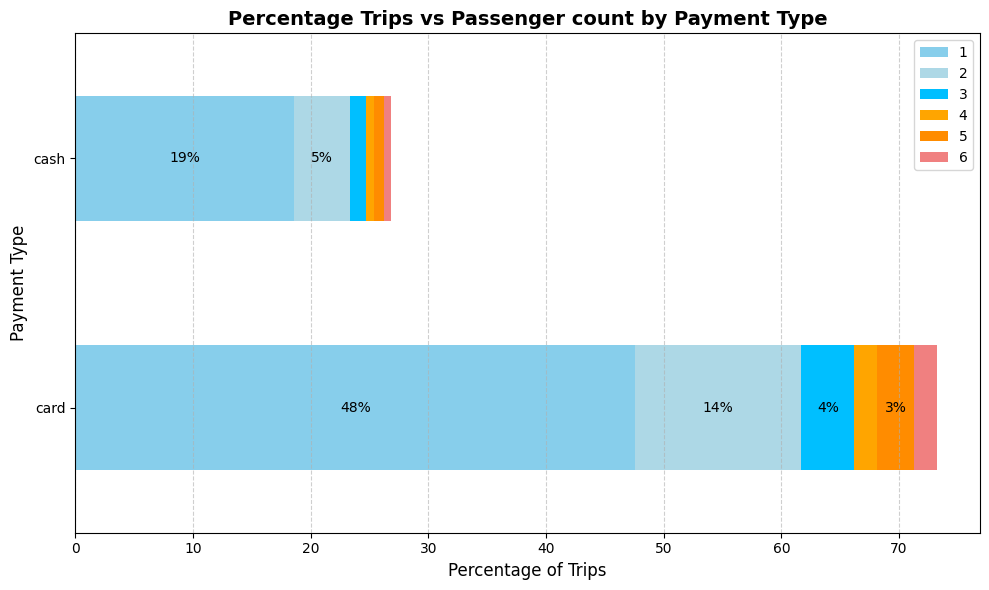

In [215]:

ax = dataframe.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    figsize=(10,6), 
    color=['#87CEEB', '#ADD8E6', '#00BFFF', '#FFA500', '#FF8C00', '#F08080']
)

plt.xlabel("Percentage of Trips", fontsize=12)
plt.ylabel("Payment Type", fontsize=12)
plt.title("Percentage Trips vs Passenger count by Payment Type", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add percentage labels inside bars
for p in ax.patches:
    width = p.get_width()
    if width > 2:  # only label if width >= 5%
        x, y = p.get_xy()
        height = p.get_height()
        ax.text(
            x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            ha='center', va='center',
            fontsize=10,
            color='black'
        )

plt.tight_layout()
plt.show()


# Hypothesis Testing

## Q-Q plot

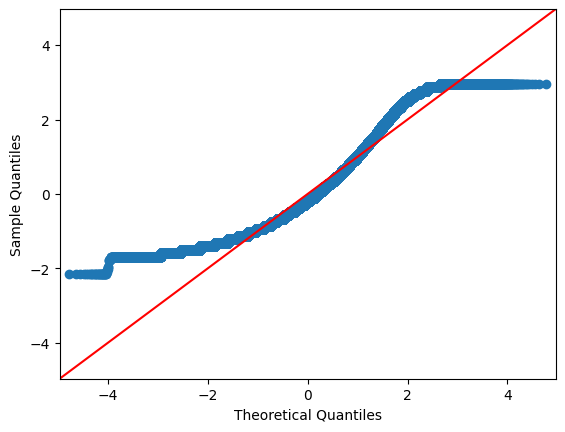

In [216]:
sm.qqplot(df['fare_amount'], line='45', fit=True)
plt.show()

In [217]:
# Independent Two-Sample t-Test for Fare Amounts Between Cash and Card Payments
data_cash = df[df['payment_type']=='cash']['fare_amount']
data_card = df[df['payment_type']=='card']['fare_amount']
t_stat, p_val = stats.ttest_ind(data_card,data_cash,equal_var = False)
print(f"T-statistic = {t_stat:.3f}, P-value = {p_val:.4f}")

T-statistic = 104.592, P-value = 0.0000


## Trip Distance vs Fare Correlation

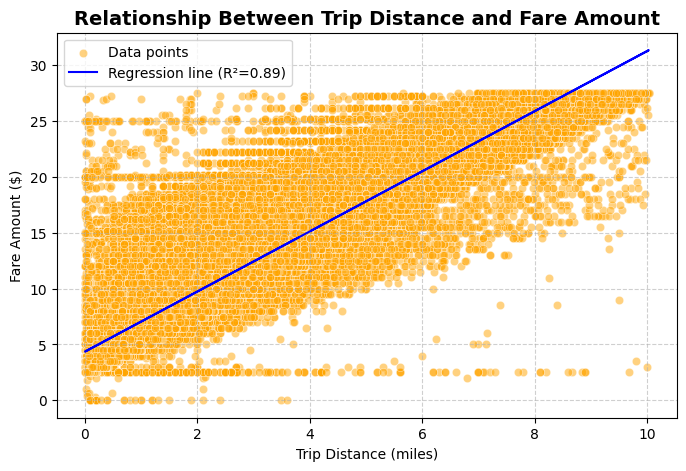

Correlation between trip distance and fare amount: 0.944


In [218]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Remove extreme outliers
filtered_df = df[
    (df['trip_distance'] > 0) & (df['trip_distance'] < 50) &
    (df['fare_amount'] > 0) & (df['fare_amount'] < 200)
]

# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(
    filtered_df['trip_distance'],
    filtered_df['fare_amount']
)

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='trip_distance', 
    y='fare_amount', 
    data=filtered_df, 
    alpha=0.5, 
    color='orange',
    label='Data points'
)

# Regression line
x_vals = filtered_df['trip_distance']
y_pred = intercept + slope * x_vals
plt.plot(x_vals, y_pred, color='blue', label=f'Regression line (R²={r_value**2:.2f})')

# Labels and formatting
plt.title("Relationship Between Trip Distance and Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Correlation coefficient
corr_value = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {corr_value:.3f}")


## Operational Insight

<IPython.core.display.Javascript object>

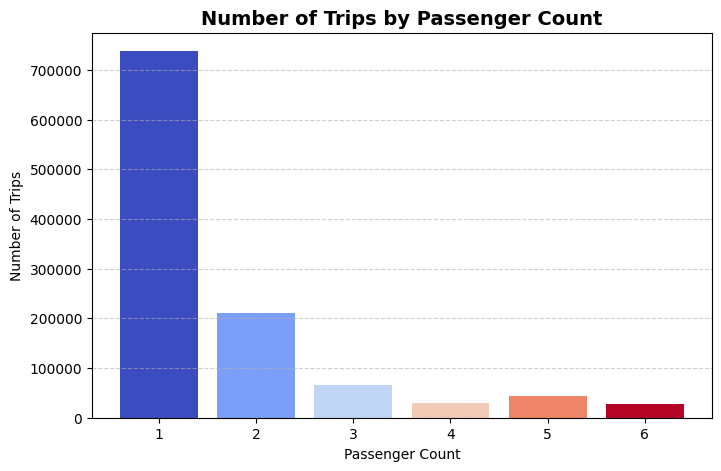

In [219]:
import matplotlib.pyplot as plt

# Count trips per passenger count
trip_counts = df['passenger_count'].value_counts().sort_index()
colors = plt.cm.coolwarm(np.linspace(0, 1, 6)) 
# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(trip_counts.index, trip_counts.values, color=colors)
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.title("Number of Trips by Passenger Count", fontsize=14, fontweight='bold')
plt.xticks(trip_counts.index)  # ensure all passenger counts show on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
